<a href="https://colab.research.google.com/github/AndrewDavidRatnam/Feature-_Engineering_Bookcamp-/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

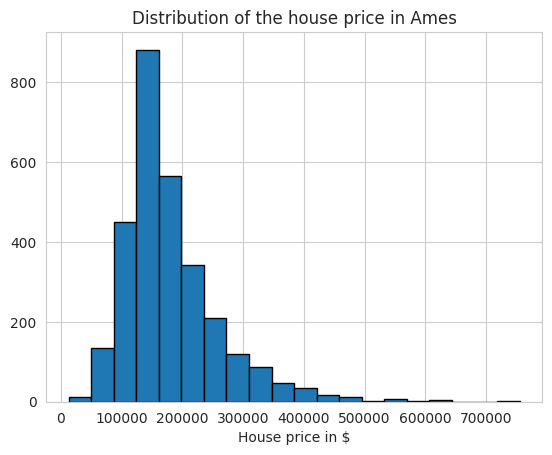

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
ames_housing = pd.read_csv("/content/AmesHousing.csv")

# Display the first few rows of the DataFrame
print(ames_housing.head())

# Perform basic data analysis (e.g., plot target variable distribution)
ames_housing['SalePrice'].hist(bins=20, edgecolor='black')
plt.xlabel("House price in $")
plt.title("Distribution of the house price in Ames")
plt.show()


In [ ]:
ames_housing.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [ ]:
ames_housing["Fireplaces"].dtype

dtype('int64')

In [ ]:
numeric_df = ames_housing.select_dtypes(include='number')

In [ ]:
corr_matrix = numeric_df.corr()

In [ ]:
corr_matrix

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


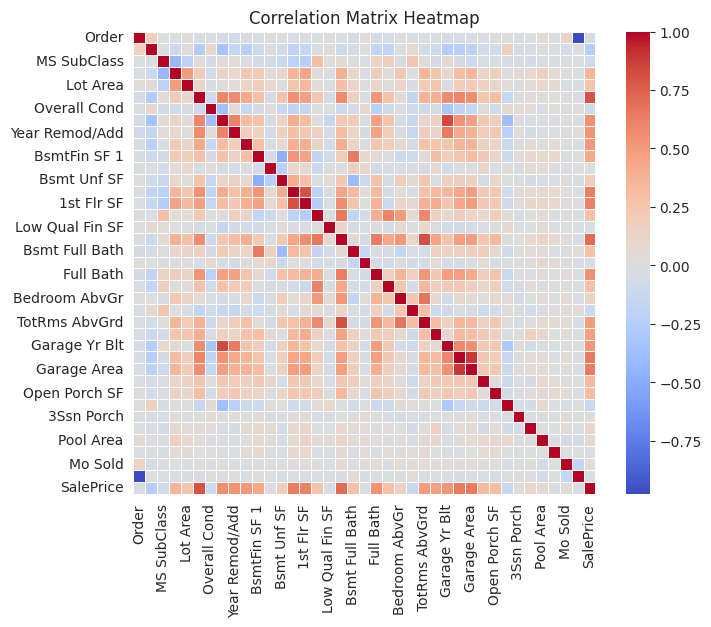

In [ ]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(corr_matrix,
           # annot=True,          # Annotate cells with the correlation values
            cmap='coolwarm',     # Choose a color map (e.g., 'coolwarm', 'Blues', 'RdBu_r')
           # fmt=".2f",           # Format the annotations to two decimal places
            linewidths=0.5,      # Add lines between cells
            square=True)         # Force cells to be square

plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
l=[]
for col in ames_housing.columns:
  l.append((col,ames_housing[col].nunique()))
meta_df = pd.DataFrame(l,columns=["column","len"])

In [ ]:
meta_df["len"].nlargest(10)

,len
0,2930
1,2930
5,1960
47,1292
38,1137
44,1083
39,1058
81,1032
35,995
45,635


In [ ]:
meta_df.query("column == 'Total Bsmt SF'")

,column,len
39,Total Bsmt SF,1058


In [ ]:
meta_df.query("column == 'Gr Liv Area'")

,column,len
47,Gr Liv Area,1292


<Axes: >

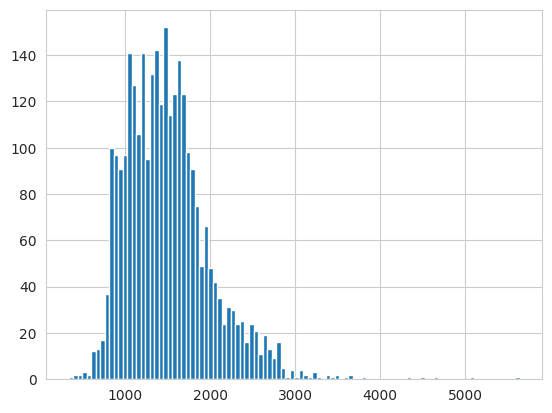

In [ ]:
ames_housing["Gr Liv Area"].hist(bins=100)

# The Machine Learning Pipeline

## Data

## Tasks

## Models

## Features

## Model Evaluation

# Fancy Tricks with Simple Numbers

## Scalars, Vectors, and Spaces

## Dealing with Counts

### Binarization

We will binarize the fireplaces column and someone who doesn't want a fire place is defferent from one who does not. but 1 or 2 fireplaces do not matter so much

more robust representation of user preference is to binarize the count and clip all
counts greater than 1 to

In [ ]:
ames_housing["Fireplaces_YorN"] = ames_housing["Fireplaces"] > 0

<Axes: xlabel='Fireplaces_YorN'>

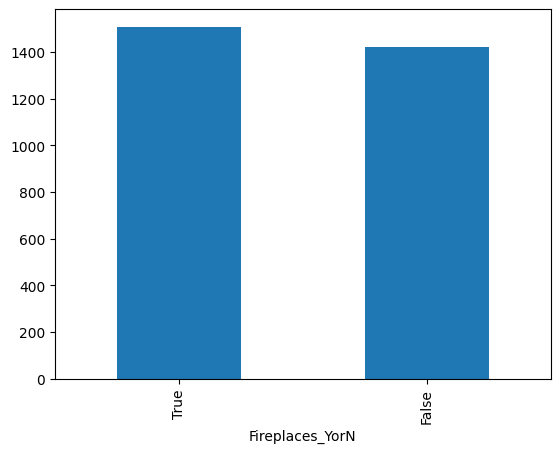

In [ ]:
ames_housing["Fireplaces_YorN"].value_counts().plot(kind="bar")

In [ ]:
ames_housing["Fireplaces_YorN"].value_counts()

,count
Fireplaces_YorN,
True,1508
False,1422


### Quantization or Binning

Raw counts that span several orders of magnitude are problematic for many models.

In [ ]:
ames_housing["Lot Area"].nunique()

1960

One solution is to contain the scale by quantizing the count.
- fixed-width
- adaptive

#### Fixed-width binning

In [ ]:
ames_housing["Lot Area"].max(),ames_housing["Lot Area"].min()

(215245, 1300)

In [ ]:
ames_housing["Lot Area sqrt"] = np.sqrt(ames_housing["Lot Area"].values)

In [ ]:
ames_housing["Lot Area sqrt"].max(),ames_housing["Lot Area sqrt"].min()

(463.9450398484717, 36.05551275463989)

In [ ]:
ames_housing["Lot Area sqrt binned"] = pd.cut(ames_housing["Lot Area sqrt"].values, 200,labels=[str(x) for x in range(200)])

<Axes: xlabel='Lot Area sqrt binned'>

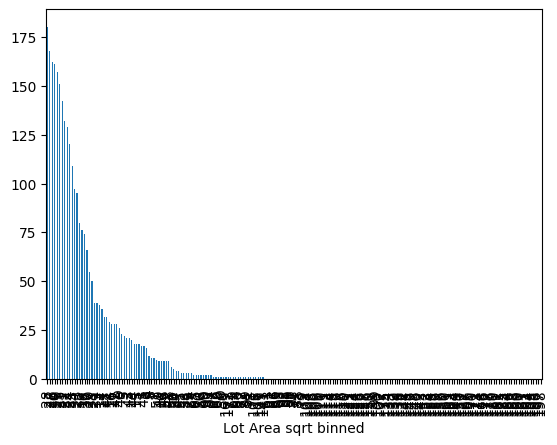

In [ ]:
ames_housing["Lot Area sqrt binned"].value_counts().plot(kind="bar")

#### Quantile binning

Fixed-width binning is easy to compute. But if there are large gaps in the counts, then
there will be many empty bins with no data.

In [ ]:
deciles = ames_housing["Lot Area"].quantile([x/20 for x in range(1,21)])
deciles

,Lot Area
0.05,3188.30
0.10,4800.00
0.15,6021.80
0.20,7000.00
0.25,7440.25
0.30,7936.70
0.35,8366.30
0.40,8734.00
0.45,9024.65
0.50,9436.50


Text(0, 0.5, 'Occurrence')

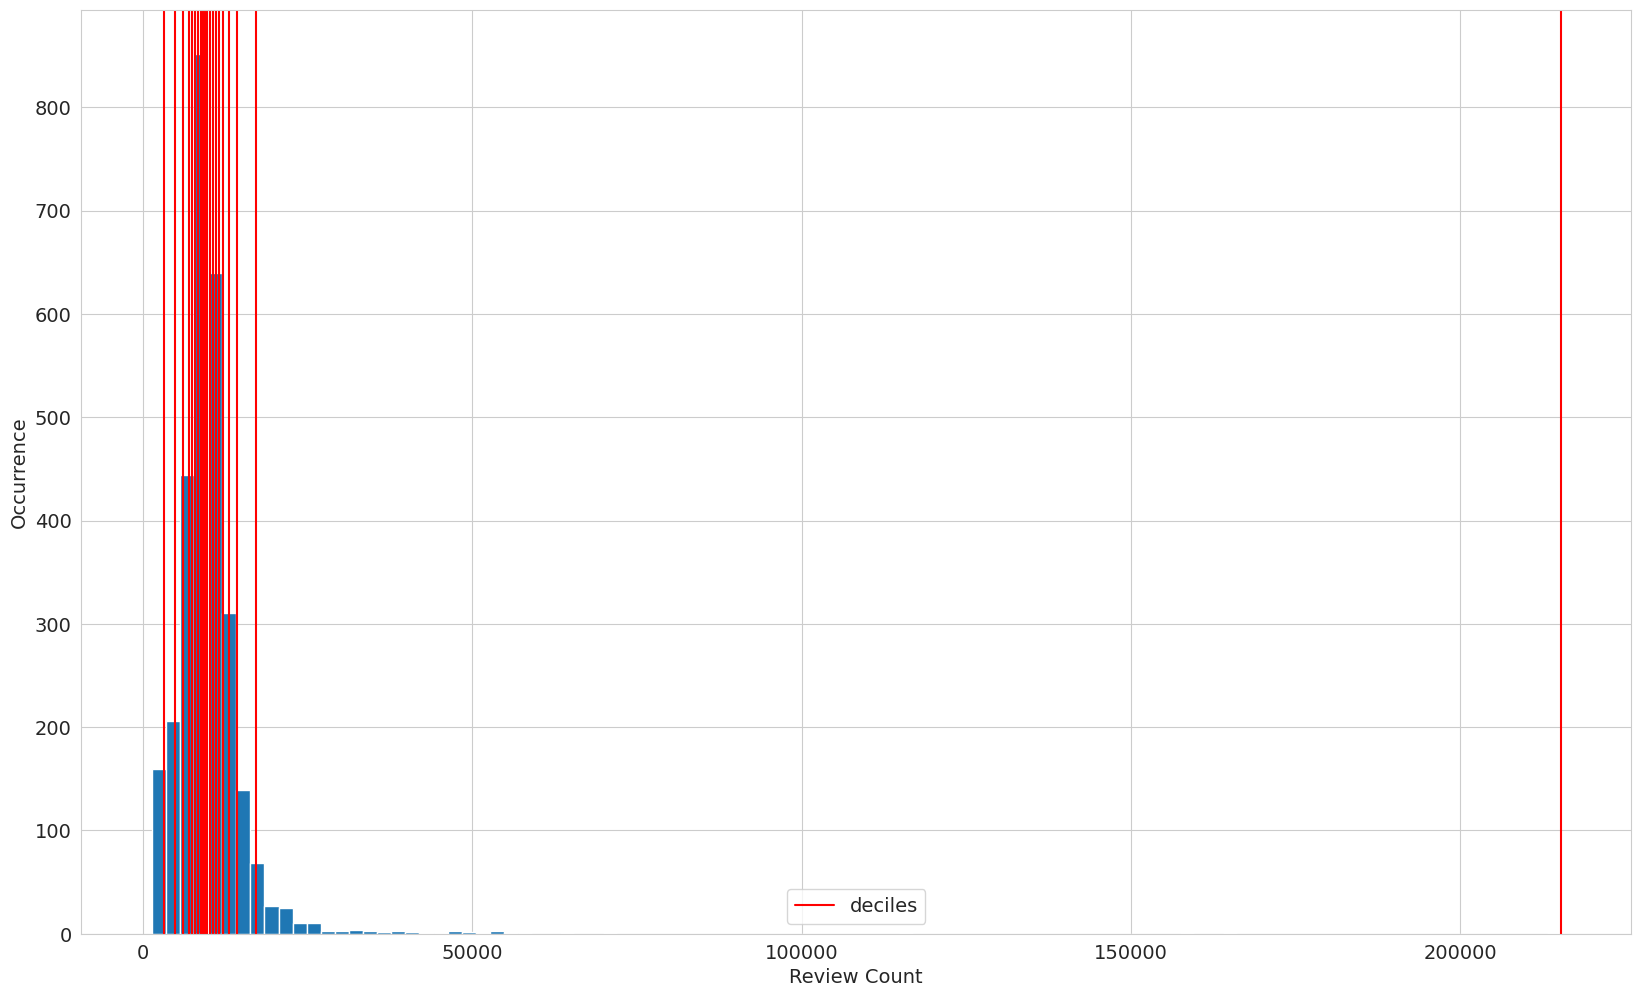

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(20,12))
ames_housing["Lot Area"].hist(ax=ax, bins=100)
for pos in deciles:
  handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

clearly shows the outliers

In [ ]:
large_counts_series = pd.qcut(ames_housing["Lot Area"],4,labels=False)
large_counts_series.quantile([0.25, 0.5, 0.75])


,Lot Area
0.25,0.25
0.50,1.50
0.75,2.75


## Log Transformation

The log transform is a powerful tool for dealing with positive numbers with a heavy-
tailed distribution. (A heavy-tailed distribution places more probability mass in the
tail range than a Gaussian distribution.)

<Axes: xlabel='Overall Qual'>

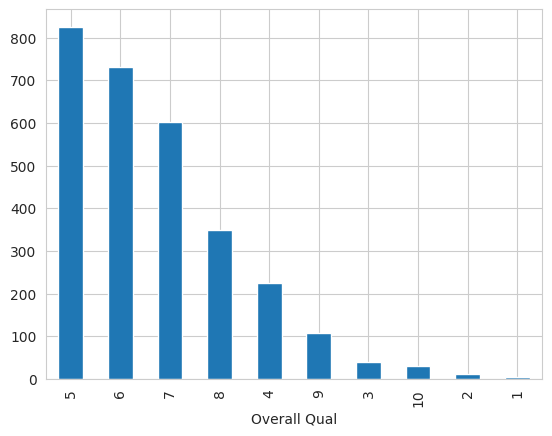

In [ ]:
ames_housing["Overall Qual"].value_counts().transpose().plot(kind="bar")

<Axes: xlabel='Overall Qual'>

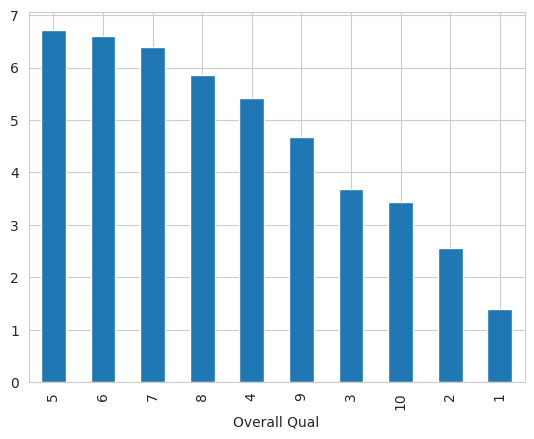

In [ ]:
np.log(ames_housing["Overall Qual"].value_counts().transpose()).plot(kind="bar")

Stupid Example i know but this column has highest correlation with sales prince

Text(0.5, 0, 'Log of Number of Words')

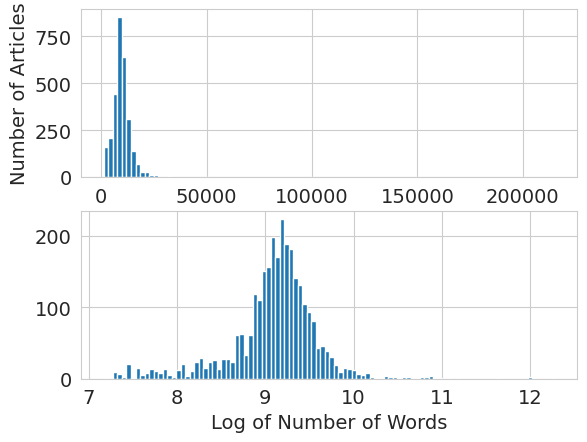

In [ ]:
floor_value = 0.0000000002
fig, (ax1, ax2) = plt.subplots(2,1)
ames_housing["Lot Area"].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Articles', fontsize=14)
np.log(ames_housing["Lot Area"] + floor_value).hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Number of Words', fontsize=14)

<Axes: >

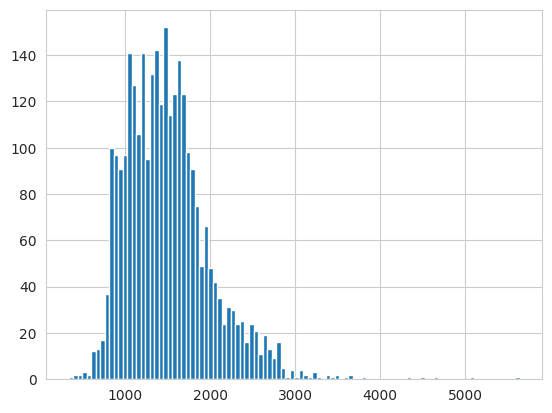

In [ ]:
ames_housing["Gr Liv Area"].hist(bins=100)


<Axes: >

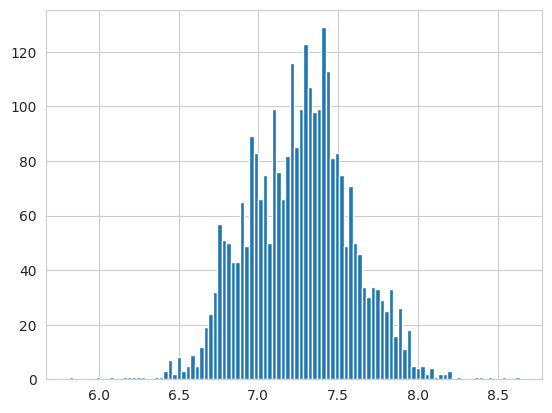

In [ ]:
np.log(ames_housing["Gr Liv Area"]).hist(bins=100)

### Log Transform in Action

In [ ]:
ames_housing[["Gr Liv Area","SalePrice"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gr Liv Area  2930 non-null   int64
 1   SalePrice    2930 non-null   int64
dtypes: int64(2)
memory usage: 45.9 KB


In [ ]:
from sklearn import linear_model

from sklearn.model_selection import cross_val_score

normal_values = ames_housing["Gr Liv Area"].values.reshape(-1,1)
log_values = np.log(ames_housing["Gr Liv Area"].values + 1).reshape(-1,1)

target = ames_housing["SalePrice"].values.reshape(-1,1)





In [ ]:
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, normal_values,target, cv=10)
print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))


R-squared score without log transform: 0.42072 (+/- 0.30517)


In [ ]:
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, log_values,target, cv=10)
print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: 0.39478 (+/- 0.32372)


ok log values did worse xD

### Power Transforms: Generalization of the Log Transform

In statistical terms, these are variance-stabilizing transformations.

In [ ]:

rc_bc, bc_params = stats.boxcox(normal_values.reshape(-1))
bc_params

np.float64(-0.014851639502348246)

<Axes: >

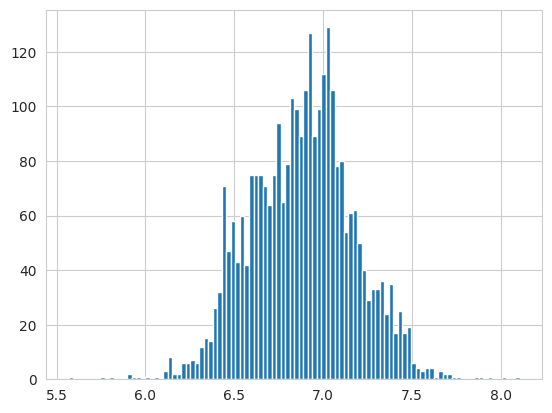

In [ ]:
pd.Series(stats.boxcox(ames_housing["Gr Liv Area"])[0]).hist(bins=100)

In [ ]:
m_box = linear_model.LinearRegression()
scores_box = cross_val_score(m_log, rc_bc.reshape(-1,1),target, cv=10)
print("R-squared score with Box-Cox: %0.5f (+/- %0.5f)" % (scores_box.mean(), scores_box.std() * 2))

R-squared score with Box-Cox: 0.39386 (+/- 0.32380)


In [ ]:
log_values.reshape(-1)

array([7.41276402, 6.79905586, 7.19293422, ..., 6.87832647, 7.23705903,
       7.60140233])

Text(0.5, 1.0, 'Probplot after Box-Cox transform')

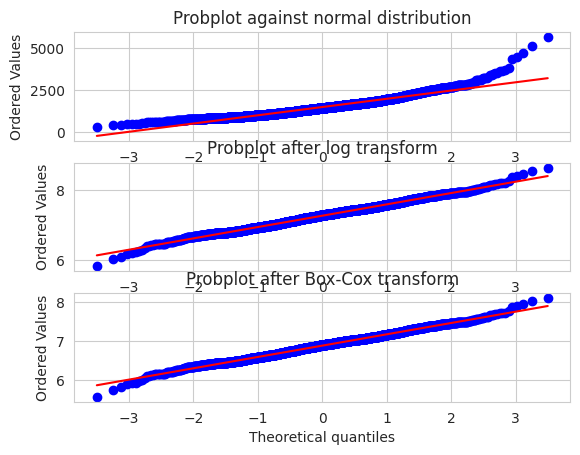

In [ ]:
fig2, (ax1, ax2, ax3) = plt.subplots(3,1)
stats.probplot(ames_housing["Gr Liv Area"], dist=stats.norm, plot=ax1)
ax1.set_title('Probplot against normal distribution')
prob2 = stats.probplot(log_values.reshape(-1), dist=stats.norm, plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after log transform')
prob3 = stats.probplot(rc_bc, dist=stats.norm, plot=ax3)
ax3.set_xlabel('Theoretical quantiles')
ax3.set_title('Probplot after Box-Cox transform')

## Feature Scaling or Normalization

Tree Based Models Do not care about scales, but just for name's scale and even the ensemble we can Scale the features

Why do we do this?
- So that when a model accepts inputs, different features may be on a different scale which can
  - cause numerical stability
  - cause the model to priorize some features etc

### Min-Max Scaling

### Standardization (Variance Scaling)

**Min Max and Standardization scaling has a chance to create sparse features(mostly 0s) . So care**

### ℓ Normalization

All these change the scale of the data but not the distribution, so when you plot it the picture will the same, just the axis values will be different

## Interaction Features

How different features when taken together give some more information, etc to help the model. Tree based models do this and are trained this way, but not linear models.<br>
Can you use this to get improved data preprocessing pipeline that actually makes your linear model miles ahead.

In [ ]:
import sklearn.preprocessing as preproc

poly = preproc.PolynomialFeatures()

## Feature Selection

feature selection is not about reducing training time—in fact, some techniques increase overall training time—but about reducing model scoring time.

- Filtering
- Wrapper: Takes a subset and gives it a score, and iteratively finds the best features
- Embedded Methods: Like Tree methods or l1 regularization(turns less important into sparse)

## Summary

# Text Data: Flattening, Filtering and Chunking

## Bag-of-X: Turning Natural Text into Flat Vectors

###  Bag of Words



### Bag of n-grams

Same as bag of words, but takes fixed sized tokens

## Filtering for Cleaner Features

### Stop Words


### Frequency Based Filtering

Basically Shanon's Info theory with just not with full-on probability typshii

### Stemming

I mean i can't use nltk or whatever package for my kaggale comp, i'll see if i can implement this from scratch.

## Atoms of Meaning: From Words to n-Grams to Phrases

### Parsing and Tokenization

### Collocation Extraction for Phrase Detection

Collocation Extraction for Phrase Detection

The quality of the trained linear classifier directly depends upon the null
space and the column space of the data matrix. A large column space means that
there is little linear dependency between the features, which is generally good. The
null space contains “novel” data points that cannot be formulated as linear combina‐
tions of existing data; a large null space could be problematic. (

## Summary

# The Effects of Feature Scaling: From Bag-of-Words to Tf-Idf

## Summary

The results were not as one might have expected. Tf-idf and ℓ2 normalization do not
improve the final classifier’s accuracy above plain bag-of-words. After acquiring
some statistical modeling and linear algebra chops, we realize why: neither of them
changes the column space of the data matrix.
- One small difference between the two is that tf-idf can “stretch” the word count as
well as “compress” it. In other words, it makes some counts bigger, and others close
to zero. Therefore, tf-idf could altogether eliminate uninformative words.
- Along the way, we also discovered another effect of feature scaling: it improves the
condition number of the data matrix, making linear models much faster to train.
Both ℓ2 normalization and tf-idf have this effect.
- To summarize, the lesson is: the right feature scaling can be helpful for classification.
The right scaling accentuates the informative words and downweights the common
words. It can also improve the condition num


- This story is a wonderful illustration of the difficulty of analyzing the effects of fea‐
ture engineering in the general case. Changing the features affects the trainingprocess and the models that ensue. Linear models are the simplest models to under‐
stand, yet it still takes very careful experimentation methodology and a lot of deep
mathematical knowledge to tease apart the theoretical and practical impacts. This
would be mostly impossible with more complicated models or feature transforma‐
tions.

# Categorical Variables: Counting Eggs in the Age of Robotic Chickens

We usually only represent categorical with binning(OHE typshoo) or bin counting or even just mappiong value counts and summary statistics wrt a variable/group to that row variable

## Encoding Categorical Variables

Dummy encoding is OHE, but it uses 0 bit to reference base category lol never thought about it

## Dealing with Large Categorical Variables

### Feature Hashin

Honestly I heavily fw with binning cause it's super useful to train boosted trees and then we can use that information to later do feature selection. it's a Win Win, or a major W, G

### Bin counting (SOP/SOTA)
But this is usally done with Tree models, more specifically boosted tree models we, can try it out later

- For **rare categories**, back-off method where the value counts have to cross some threshold, OR count min sketch in which all categories are mapped to hash functions with output range m < k (no of categories) amd then then retreiving or using , compute or recompute the hash and return smallest statistic.

# Dimensionality Reduction: Squashing the Data Pancake with PCA

# Nonlinear Featurization via K-Means Model Stacking